# WEEK 02
# Encounter 07 - Matplot lib
# Project Challenge (PART 3) - Number of unique names over time

## Task Description


1. How has the number of unique names given to newborn children varied over time?
2. For each year from 1880 til 2020
       * read in the data using the `parse_dataset()` function
       * use `nunique()` to count the unique names for each year
       * keep track of the year and the count in a dictionary
       * convert dictionary to `pandasDataFrame` as was done in the first milestone for this lesson
3. Visualize the data, use the years on the x-axis and the counts on the y-axis.


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# list of columns in DataFrame
col_list=['name', 'gender', 'frequency']

In [3]:
# my parse_dataset(year) function
def parse_dataset(year):
    '''Function accepts year, reads appropriate data file and returns DataFrame with header'''
    
    # Check if entered YEAR is at least an INT number; if not, return a text message
    if type(year) is int:
        path = f'../data/yob{year}.txt'
        if os.path.isfile(path):
            dataset = pd.read_csv(path, names=col_list)
            return dataset
        else:
            return print(f'There is no file with entered YEAR = \'{year}\'!')
    
    else:
        return print(f'Entered YEAR = \'{year}\' is not an INT value!')


In [7]:
# read in the data using the `parse_dataset()` function
# use `nunique()` to count the unique names for each year
# keep track of the year and the count in a dictionary
# convert dictionary to `pandasDataFrame`

# Make a empty dictionary that maps the column names year and total_births to empty lists:
unique_names_qty_dict = {'year':[], 'unique_names_qty':[]}

for year in range(1880,2021):
    # parsing current year dataset
    df_temp = parse_dataset(year)
    
    #counting total_births
    unique_names_qty = df_temp['name'].nunique()
     
    # adding 'year' and 'total' to 'birth_dict' dictionary
    unique_names_qty_dict['unique_names_qty'].append(unique_names_qty)
    unique_names_qty_dict['year'].append(year)

In [8]:
# Create a yearly_births DataFrame by passing births_dictto pd.DataFrame()
unique_names_qty = pd.DataFrame(unique_names_qty_dict)
unique_names_qty

,year,unique_names_qty
0,1880,1889
1,1881,1829
2,1882,2012
3,1883,1962
4,1884,2158
...,...,...
136,2016,30440
137,2017,30054
138,2018,29637
139,2019,29456


Text(0, 0.5, 'Unique Names Quantity')

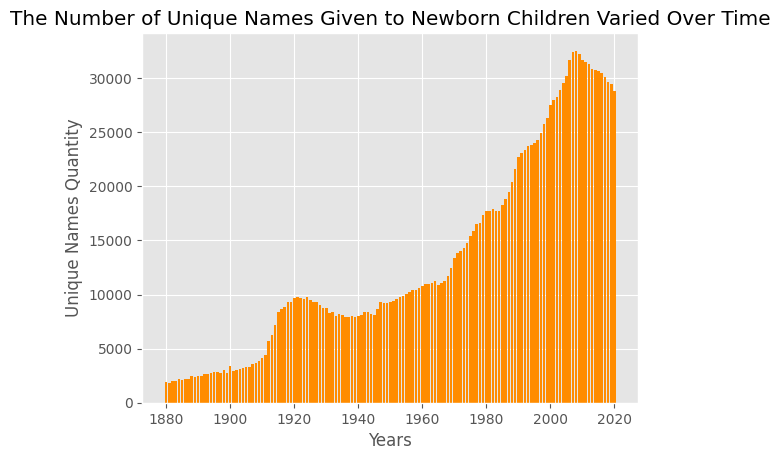

In [10]:
# Visualize the data, use the years on the x-axis and the counts on the y-axis.

x_vals = unique_names_qty['year']
y_vals = unique_names_qty['unique_names_qty']

# plotting starts
plt.style.use('ggplot')
plt.figure(figsize=(6.4, 4.8))

plt.bar(x_vals, y_vals, label='the number of unique names', color='darkorange')

# title
plt.title('The Number of Unique Names Given to Newborn Children Varied Over Time')

# label names
plt.xlabel('Years')
plt.ylabel('Unique Names Quantity')

# save plot at given path
#plt.savefig('../images/some_random_plot.pdf')